In [119]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

618

In [118]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('+++++++++++++++++++++++++++++')

# raw_cities = ['Seattle', 'Los Angeles', 'Chicago', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('+++++++++++++++++++++++++++++')
print('Data Retrieval Complete')
print('+++++++++++++++++++++++++++++')

Beginning Data Retrieval
+++++++++++++++++++++++++++++
processing Record 1 of Set 1 | busselton
processing Record 2 of Set 1 | atuona
processing Record 3 of Set 1 | punta arenas
processing Record 4 of Set 1 | port alfred
processing Record 5 of Set 1 | mataura
processing Record 6 of Set 1 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
processing Record 7 of Set 1 | mount pleasant
processing Record 8 of Set 1 | dhidhdhoo
processing Record 9 of Set 1 | bathsheba
processing Record 10 of Set 1 | lata
processing Record 11 of Set 1 | rikitea
processing Record 12 of Set 1 | hermanus
processing Record 13 of Set 1 | kindu
processing Record 14 of Set 1 | faanui
processing Record 15 of Set 1 | nikolskoye
processing Record 16 of Set 1 | scottsburgh
City scottsburgh not found. Skipping...
processing Record 17 of Set 1 | ribeira grande
processing Record 18 of Set 1 | awjilah
processing Record 19 of Set 1 | nueva gorgona
processing Record 20 of Set 1 | pedernales
processing Record 21 

processing Record 37 of Set 4 | katangli
processing Record 38 of Set 4 | buala
processing Record 39 of Set 4 | miri
processing Record 40 of Set 4 | turkistan
processing Record 41 of Set 4 | hualmay
processing Record 42 of Set 4 | cap-aux-meules
processing Record 43 of Set 4 | pudozh
processing Record 44 of Set 4 | skibbereen
processing Record 45 of Set 4 | jardim
processing Record 46 of Set 4 | bocaranga
City bocaranga not found. Skipping...
processing Record 47 of Set 4 | sur
processing Record 48 of Set 4 | snasa
processing Record 49 of Set 4 | ocampo
processing Record 50 of Set 4 | concarneau
processing Record 1 of Set 5 | keti bandar
processing Record 2 of Set 5 | ahipara
processing Record 3 of Set 5 | muli
processing Record 4 of Set 5 | meadow lake
processing Record 5 of Set 5 | mys shmidta
City mys shmidta not found. Skipping...
processing Record 6 of Set 5 | saint-philippe
processing Record 7 of Set 5 | qasigiannguit
processing Record 8 of Set 5 | clyde river
processing Record 9 

processing Record 21 of Set 8 | nador
processing Record 22 of Set 8 | rudraprayag
processing Record 23 of Set 8 | marovoay
processing Record 24 of Set 8 | wuwei
processing Record 25 of Set 8 | san cristobal
processing Record 26 of Set 8 | riyadh
processing Record 27 of Set 8 | ancud
processing Record 28 of Set 8 | aden
processing Record 29 of Set 8 | kebemer
City kebemer not found. Skipping...
processing Record 30 of Set 8 | karmaskaly
processing Record 31 of Set 8 | prince rupert
processing Record 32 of Set 8 | eureka
processing Record 33 of Set 8 | husavik
processing Record 34 of Set 8 | iwaki
processing Record 35 of Set 8 | udomlya
processing Record 36 of Set 8 | lida
processing Record 37 of Set 8 | zeya
processing Record 38 of Set 8 | anthili
processing Record 39 of Set 8 | nanakuli
processing Record 40 of Set 8 | mayumba
processing Record 41 of Set 8 | zaragoza
processing Record 42 of Set 8 | marsa matruh
processing Record 43 of Set 8 | beringovskiy
processing Record 44 of Set 8 |

processing Record 7 of Set 12 | huazolotitlan
City huazolotitlan not found. Skipping...
processing Record 8 of Set 12 | jizan
processing Record 9 of Set 12 | benjamin aceval
processing Record 10 of Set 12 | olenegorsk
processing Record 11 of Set 12 | chik
processing Record 12 of Set 12 | tumannyy
City tumannyy not found. Skipping...
processing Record 13 of Set 12 | oristano
processing Record 14 of Set 12 | brae
processing Record 15 of Set 12 | giddalur
processing Record 16 of Set 12 | wagar
processing Record 17 of Set 12 | mpulungu
processing Record 18 of Set 12 | bridlington
processing Record 19 of Set 12 | san luis
processing Record 20 of Set 12 | asau
processing Record 21 of Set 12 | kavaratti
processing Record 22 of Set 12 | krasnozerskoye
processing Record 23 of Set 12 | shingu
processing Record 24 of Set 12 | barawe
City barawe not found. Skipping...
processing Record 25 of Set 12 | aiquile
processing Record 26 of Set 12 | napanee
processing Record 27 of Set 12 | belmonte
process

# Insert Raw Data in Dataframe

In [22]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [120]:
#  Display the DataFrame

cityWeatherDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.51,80,0,11.59,AU,1672352191
1,Atuona,-9.8000,-139.0333,78.48,72,14,16.71,PF,1672352191
2,Punta Arenas,-53.1500,-70.9167,51.91,54,40,18.41,CL,1672352192
3,Port Alfred,-33.5906,26.8910,59.18,95,92,1.01,ZA,1672352193
4,Mataura,-46.1927,168.8643,60.06,45,30,4.65,NZ,1672352194
...,...,...,...,...,...,...,...,...,...
567,Mathathane,-22.2687,28.7495,80.01,47,91,9.26,BW,1672352677
568,Paraíso,9.8383,-83.8656,76.06,81,83,4.03,CR,1672352415
569,Karachi,24.9056,67.0822,66.02,68,0,4.61,PK,1672352405
570,Charters Towers,-20.1000,146.2667,76.57,66,100,4.47,AU,1672352678


In [121]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [122]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          572
Lat           570
Lng           570
Max Temp      538
Humidity       81
Cloudiness     85
Wind Speed    346
Country       118
Date          401
dtype: int64

In [123]:
# Export Data into .csv file
cityWeatherDF.to_csv("../city_weather.csv", index=False)

# Inspect the data and remove the cities where the humidity > 100%.

In [124]:
#Skip if no cities with humidity of 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.592385,19.489406,48.334615,75.590909,61.400350,8.337815,1.672352e+09
std,33.152457,90.764639,31.044422,19.714524,40.256431,6.448456,1.690041e+02
min,-54.800000,-179.166700,-43.620000,9.000000,0.000000,0.000000,1.672352e+09
25%,-6.283325,-61.670275,28.957500,66.000000,19.000000,3.705000,1.672352e+09
50%,28.266700,23.003950,58.575000,79.000000,76.000000,6.720000,1.672352e+09
75%,49.998900,100.586550,74.665000,91.000000,100.000000,11.300000,1.672353e+09
max,78.218600,179.316700,94.620000,100.000000,100.000000,37.980000,1.672353e+09


# By looking at the minimum and maximum value of Humidity, we can see the no cities have humidity greater than 100%. So no rows displayed after below filter selection too.

In [125]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [126]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.51,80,0,11.59,AU,1672352191
1,Atuona,-9.8000,-139.0333,78.48,72,14,16.71,PF,1672352191
2,Punta Arenas,-53.1500,-70.9167,51.91,54,40,18.41,CL,1672352192
3,Port Alfred,-33.5906,26.8910,59.18,95,92,1.01,ZA,1672352193
4,Mataura,-46.1927,168.8643,60.06,45,30,4.65,NZ,1672352194
5,Mt. Pleasant,32.7941,-79.8626,64.54,62,0,6.91,US,1672352141
6,Dhidhdhoo,6.8833,73.1000,81.14,77,82,17.22,MV,1672352195
7,Bathsheba,13.2167,-59.5167,77.61,83,20,20.71,BB,1672352195
8,Lata,40.1629,-8.3327,61.07,95,100,11.32,PT,1672352196
9,Rikitea,-23.1203,-134.9692,78.24,67,54,4.25,PF,1672352197


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# 
Latitude vs. Temperature Plot

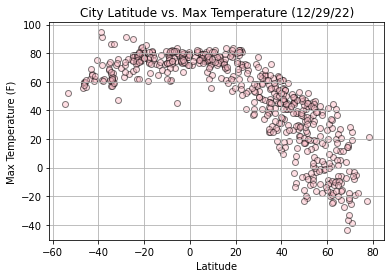

In [127]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

In [128]:
# Latitude vs. Humidity Plot


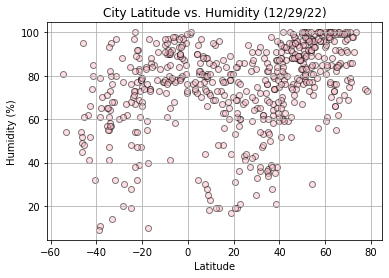

In [129]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../WeatherPy_CityLat_vs_Humidity.png")
plt.show()

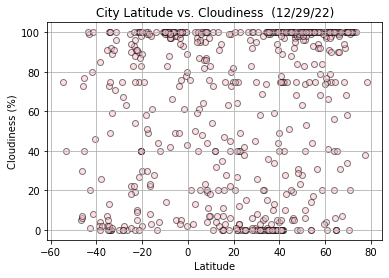

In [130]:
# Latitude vs. Cloudiness Plot

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

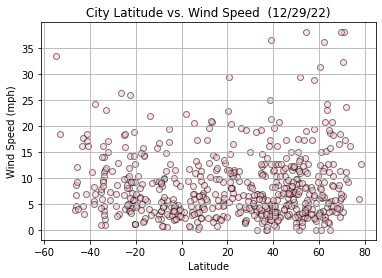

In [131]:
# Latitude vs. Wind Speed

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

In [138]:
# Linear Regression


def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values, color='pink', alpha=0.5, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=13,color="black")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()


In [139]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Mt. Pleasant,32.7941,-79.8626,64.54,62,0,6.91,US,1672352141
6,Dhidhdhoo,6.8833,73.1000,81.14,77,82,17.22,MV,1672352195
7,Bathsheba,13.2167,-59.5167,77.61,83,20,20.71,BB,1672352195
8,Lata,40.1629,-8.3327,61.07,95,100,11.32,PT,1672352196
13,Nikolskoye,59.7035,30.7861,26.49,93,100,10.29,RU,1672352200


In [140]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.51,80,0,11.59,AU,1672352191
1,Atuona,-9.8000,-139.0333,78.48,72,14,16.71,PF,1672352191
2,Punta Arenas,-53.1500,-70.9167,51.91,54,40,18.41,CL,1672352192
3,Port Alfred,-33.5906,26.8910,59.18,95,92,1.01,ZA,1672352193
4,Mataura,-46.1927,168.8643,60.06,45,30,4.65,NZ,1672352194


In [141]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

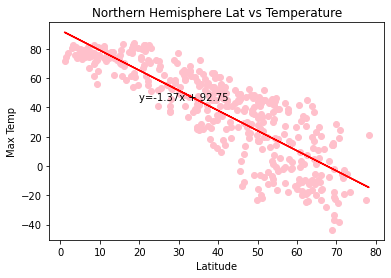

In [142]:
plt.scatter(northernHemisphereDF["Lat"], northernHemisphereDF["Max Temp"], color='pink')
x_axis = northernHemisphereDF["Lat"]
y_axis = northernHemisphereDF["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

The r-squared is: 0.7206961172526388


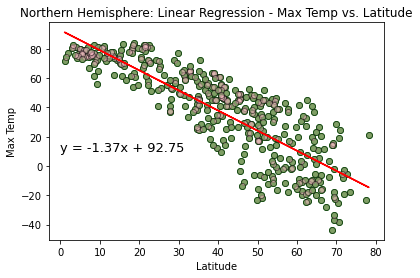

In [143]:
# Add the linear regression equation and line to plot
plt.scatter(northernHemisphereDF['Lat'],northernHemisphereDF['Max Temp'], color='green')
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']


plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.23175164248806993


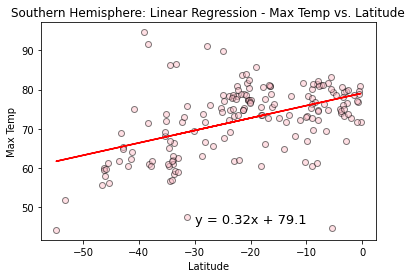

In [144]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.1610669143926513


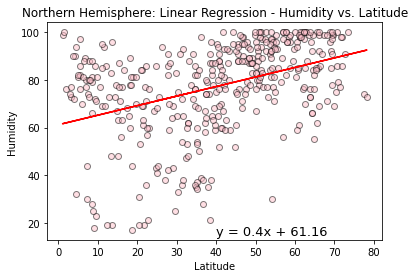

In [145]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.22857344182569578


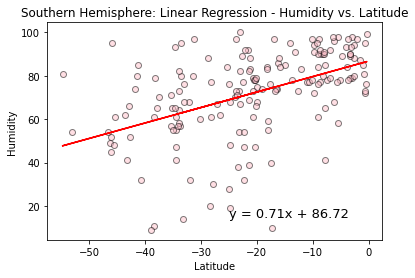

In [146]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.08407891898678209


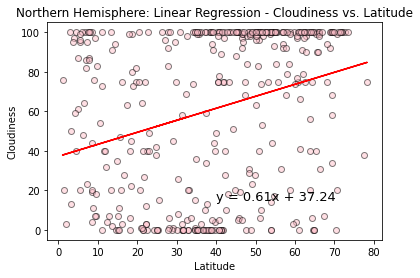

In [147]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.13362335737510947


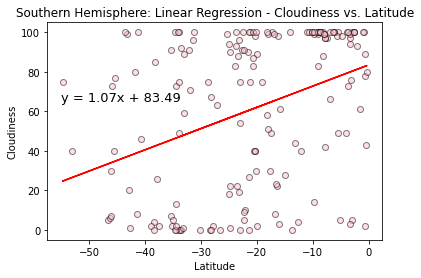

In [148]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.01393823534856543


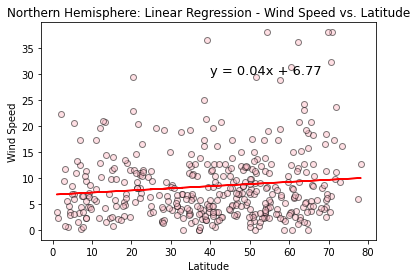

In [149]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.09703739624782326


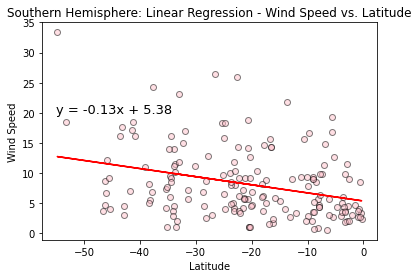

In [150]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)